A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

Data

|Variable|	Definition|
|:-------:|:-------:
|User_ID	|User ID|
|Product_ID |	Product ID|
|Gender|	Sex of User|
|Age|	Age in bins|
|Occupation|	Occupation (Masked)|
|City_Category|	Category of the City (A,B,C)|
|Stay_In_Current_City_Years|	Number of years stay in current city|
|Marital_Status	|Marital Status|
|Product_Category_1	|Product Category (Masked)|
|Product_Category_2|	Product may belongs to other category also (Masked)|
|Product_Category_3|	Product may belongs to other category also (Masked)|
|Purchase	|Purchase Amount (Target Variable)|

In [3]:
import io
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%cd "H:\Data Science Projects\Black_friday"

H:\Data Science Projects\Black_friday


    -> Train file is complete data including dependent variable(y)

    -> Test file will not have dependent variable(y) which needs to be predicted using model built on train data sample     submission file is where predictions are copied for uploading into competition site for checking the result and accuracy

## Data Preprocessing & Exploratory Data Analysis

In [5]:
bftrain=pd.read_csv('train.csv') # Importing train file

In [6]:
bftest=pd.read_csv('test.csv') # Importing test file

In [7]:
bftrain.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
bftrain.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
bftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [10]:
bftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [11]:
(bftrain.isnull().sum() / len(bftrain)) * 100 #Checking for null values percentage.

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [12]:
(bftest.isnull().sum() / len(bftest)) * 100 #Checking for null values percentage.

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            30.969311
Product_Category_3            69.590195
dtype: float64

    -> The train and test dataset have some missing values that need to be filled.

    -> We will concatenate the test and train dataframes for data preprocessing, which requires the same number and order of variables in both dataframes.

    -> Therefore, we will temporarily add a dependent variable to the test data for preprocessing purposes.

In [13]:
#Temporarly add dependent variable to test data for preprocessing
bftest['Purchase']='test'

In [14]:
# Combine Both Dataframes for preprocessing

# For Concatenation of 2 dataframes the number of variables and squence of variables must be same.

combinedf=pd.concat([bftrain,bftest],axis=0)

In [15]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    783667 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 77.7+ MB


In [16]:
combinedf.isnull().sum()# The total number of missing values in the dataset for each variable

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                           0
dtype: int64

### Imputing the missing values.

In [17]:
combinedf.Product_Category_2.value_counts(dropna=False)

NaN     245982
8.0      91317
14.0     78834
2.0      70498
16.0     61687
15.0     54114
5.0      37165
4.0      36705
6.0      23575
11.0     20230
17.0     19104
13.0     15054
9.0       8177
12.0      7801
10.0      4420
3.0       4123
18.0      4027
7.0        854
Name: Product_Category_2, dtype: int64

In [18]:
combinedf.Product_Category_2=combinedf.Product_Category_2.fillna('0')

In [19]:
combinedf.Product_Category_2.value_counts(dropna=False)

0       245982
8.0      91317
14.0     78834
2.0      70498
16.0     61687
15.0     54114
5.0      37165
4.0      36705
6.0      23575
11.0     20230
17.0     19104
13.0     15054
9.0       8177
12.0      7801
10.0      4420
3.0       4123
18.0      4027
7.0        854
Name: Product_Category_2, dtype: int64

In [20]:
combinedf.Product_Category_3.value_counts(dropna=False)

NaN     545809
16.0     46469
15.0     39968
14.0     26283
17.0     23818
5.0      23799
8.0      17861
9.0      16532
12.0     13115
13.0      7849
6.0       6888
18.0      6621
4.0       2691
11.0      2585
10.0      2501
3.0        878
Name: Product_Category_3, dtype: int64

In [21]:
combinedf.Product_Category_3=combinedf.Product_Category_3.fillna('0')

In [22]:
combinedf.Product_Category_3.value_counts(dropna=False)

0       545809
16.0     46469
15.0     39968
14.0     26283
17.0     23818
5.0      23799
8.0      17861
9.0      16532
12.0     13115
13.0      7849
6.0       6888
18.0      6621
4.0       2691
11.0      2585
10.0      2501
3.0        878
Name: Product_Category_3, dtype: int64

In [23]:
combinedf.info() #No more missing values.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     783667 non-null  int64 
 1   Product_ID                  783667 non-null  object
 2   Gender                      783667 non-null  object
 3   Age                         783667 non-null  object
 4   Occupation                  783667 non-null  int64 
 5   City_Category               783667 non-null  object
 6   Stay_In_Current_City_Years  783667 non-null  object
 7   Marital_Status              783667 non-null  int64 
 8   Product_Category_1          783667 non-null  int64 
 9   Product_Category_2          783667 non-null  object
 10  Product_Category_3          783667 non-null  object
 11  Purchase                    783667 non-null  object
dtypes: int64(4), object(8)
memory usage: 77.7+ MB


In [24]:
#droping the User_ID & Product_ID as these are unique variables.

combinedf=combinedf.drop(['User_ID','Product_ID'],axis=1)

In [25]:
combinedf.Occupation.value_counts().sort_values()

8       2189
9       8929
18      9367
13     11053
19     11919
11     16593
15     17356
5      17373
10     18304
3      25126
6      29102
16     36122
2      37996
14     38782
12     44448
20     47840
17     57418
1      67687
7      84127
0      98850
4     103086
Name: Occupation, dtype: int64

In [26]:
combinedf.Marital_Status.value_counts().sort_values()

1    321129
0    462538
Name: Marital_Status, dtype: int64

In [27]:
combinedf.Product_Category_1.value_counts()

5     215950
1     200699
8     162294
11     34440
2      34056
6      29326
3      28791
4      16756
16     13933
15      8984
13      7930
10      7373
12      5610
7       5345
18      4436
20      2550
14      2186
19      1603
17       801
9        604
Name: Product_Category_1, dtype: int64

In [28]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Gender                      783667 non-null  object
 1   Age                         783667 non-null  object
 2   Occupation                  783667 non-null  int64 
 3   City_Category               783667 non-null  object
 4   Stay_In_Current_City_Years  783667 non-null  object
 5   Marital_Status              783667 non-null  int64 
 6   Product_Category_1          783667 non-null  int64 
 7   Product_Category_2          783667 non-null  object
 8   Product_Category_3          783667 non-null  object
 9   Purchase                    783667 non-null  object
dtypes: int64(3), object(7)
memory usage: 65.8+ MB


In [29]:
#split data back to train and test 
bftrain_df=combinedf[combinedf.Purchase!='test']
bftest_df=combinedf[combinedf.Purchase=='test']

In [30]:
bftrain_df['Purchase'] = pd.to_numeric(bftrain_df['Purchase'], errors='coerce')

C:\Users\hp\AppData\Local\Temp\ipykernel_1160\3853269522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bftrain_df['Purchase'] = pd.to_numeric(bftrain_df['Purchase'], errors='coerce')


In [31]:
bftest_df=bftest_df.drop('Purchase',axis=1)

In [32]:
bftrain_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Gender                      550068 non-null  object
 1   Age                         550068 non-null  object
 2   Occupation                  550068 non-null  int64 
 3   City_Category               550068 non-null  object
 4   Stay_In_Current_City_Years  550068 non-null  object
 5   Marital_Status              550068 non-null  int64 
 6   Product_Category_1          550068 non-null  int64 
 7   Product_Category_2          550068 non-null  object
 8   Product_Category_3          550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 46.2+ MB


### Data Visualization

M    414259
F    135809
Name: Gender, dtype: int64


Text(0.5, 1.0, 'Which Gender is buying the most')

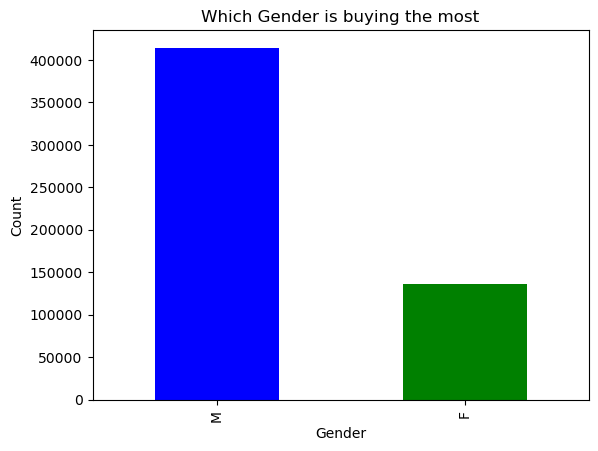

In [33]:
print(bftrain_df.Gender.value_counts())
bftrain_df.Gender.value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Which Gender is buying the most')

The data shows that male customers have a higher purchasing rate than female customers on Black Friday. This could indicate different shopping preferences or behaviors between the two groups.

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64


Text(0.5, 1.0, 'Which age customers are buying the most')

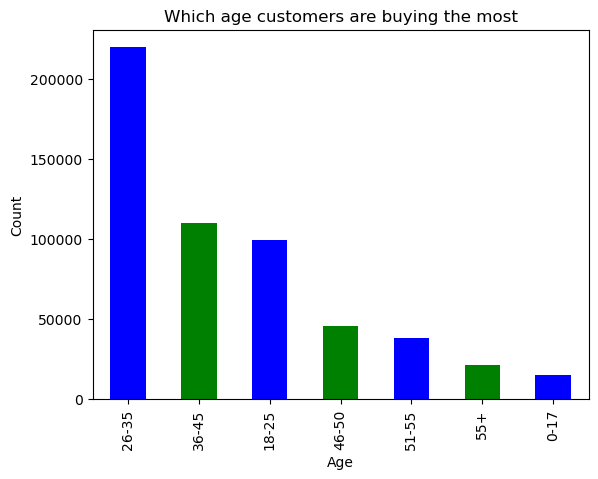

In [34]:
print(bftrain_df.Age.value_counts())
bftrain_df.Age.value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Which age customers are buying the most')

The data shows that the most profitable age group on Black Friday is 26-35, followed by 18-25 and 36-45. The least buyers are under 17 and over 45. This suggests that Black Friday appeals more to young and middle-aged adults than to teenagers and seniors.

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64


Text(0.5, 1.0, 'Which Occupation customers are buying the most')

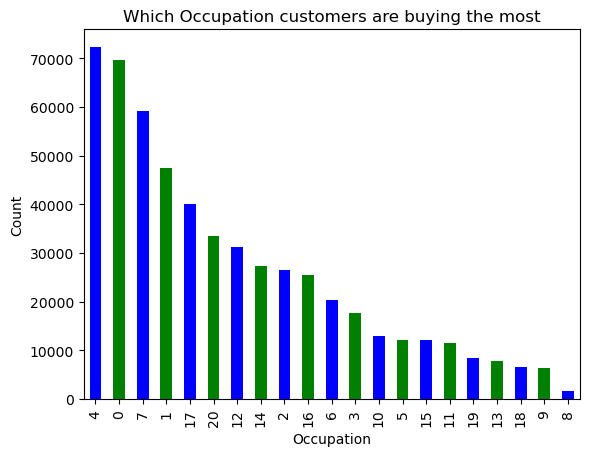

In [35]:
print(bftrain_df.Occupation.value_counts())
bftrain_df.Occupation.value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Which Occupation customers are buying the most')

The data we have on the occupation groups of our customers is anonymized, so we cannot identify the most profitable ones. However, we can see that the groups with codes 4, 0 and 7 have the highest purchase rates on blackfriday.

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64


Text(0.5, 1.0, 'Who are buying the most')

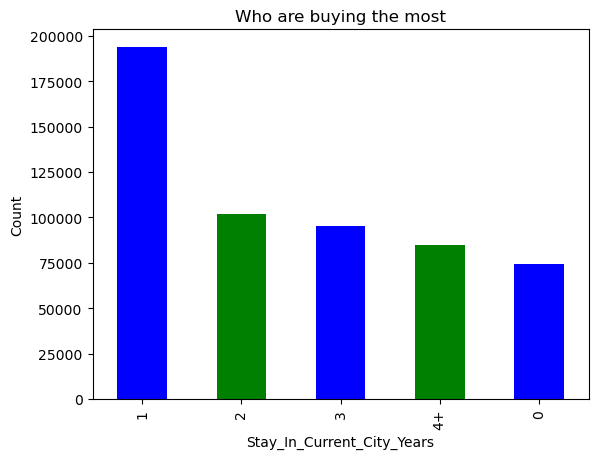

In [36]:
print(bftrain_df.Stay_In_Current_City_Years.value_counts())
bftrain_df.Stay_In_Current_City_Years.value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Count')
plt.title('Who are buying the most')

The data shows that long-term city residents are fewer than newcomers who have lived in the city for one year or less. The latter group buys more products than the former

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64


Text(0.5, 1.0, 'Which city customers are buying the most')

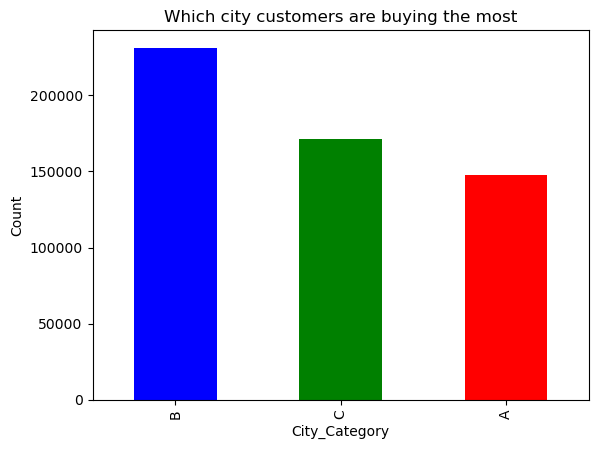

In [37]:
print(bftrain_df.City_Category.value_counts())
bftrain_df.City_Category.value_counts().plot(kind='bar', color=['blue', 'green','red'])
plt.xlabel('City_Category')
plt.ylabel('Count')
plt.title('Which city customers are buying the most')

The data shows that city B has the highest number of customers on Black Friday, followed by city C and city A. This suggests that city B has a higher demand for our products and services than the other two cities. We should analyze the factors that influence this trend and use them to improve our marketing strategies.

0    324731
1    225337
Name: Marital_Status, dtype: int64


Text(0.5, 1.0, 'Who are our customers')

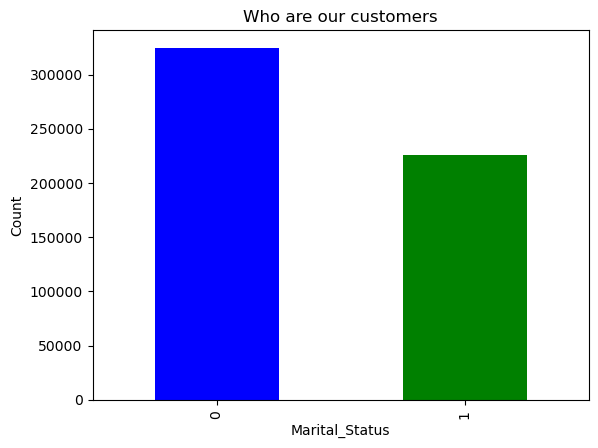

In [38]:
print(bftrain_df.Marital_Status.value_counts())
bftrain_df.Marital_Status.value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Marital_Status')
plt.ylabel('Count')
plt.title('Who are our customers')

We can use 0 to represent unmarried customers and 1 to represent married customers. Our data shows that most of our customers are unmarried (0) rather than married (1).

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64


Text(0.5, 1.0, 'Which Product_Category_1 are people buying the most')

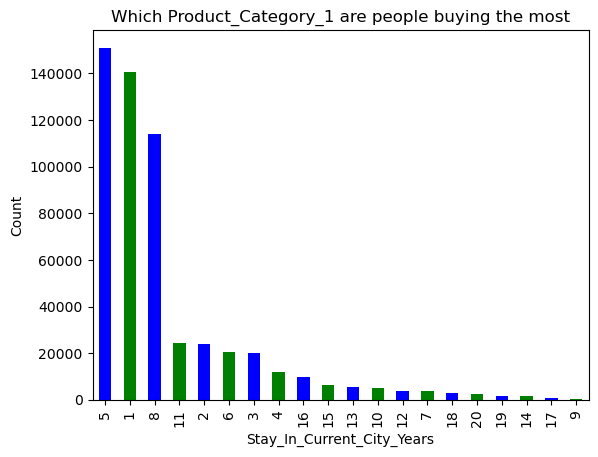

In [39]:
print(bftrain_df.Product_Category_1.value_counts())
bftrain_df.Product_Category_1.value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Count')
plt.title('Which Product_Category_1 are people buying the most')

0       173638
8.0      64088
14.0     55108
2.0      49217
16.0     43255
15.0     37855
5.0      26235
4.0      25677
6.0      16466
11.0     14134
17.0     13320
13.0     10531
9.0       5693
12.0      5528
10.0      3043
3.0       2884
18.0      2770
7.0        626
Name: Product_Category_2, dtype: int64


Text(0.5, 1.0, 'Which Product_Category_2 are people buying the most')

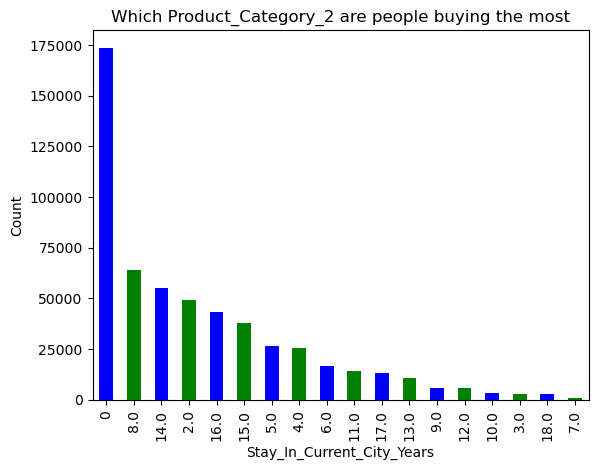

In [40]:
print(bftrain_df.Product_Category_2.value_counts())
bftrain_df.Product_Category_2.value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Count')
plt.title('Which Product_Category_2 are people buying the most')

0       383247
16.0     32636
15.0     28013
14.0     18428
17.0     16702
5.0      16658
8.0      12562
9.0      11579
12.0      9246
13.0      5459
6.0       4890
18.0      4629
4.0       1875
11.0      1805
10.0      1726
3.0        613
Name: Product_Category_3, dtype: int64


Text(0.5, 1.0, 'Which Product_Category_3 are people buying the most')

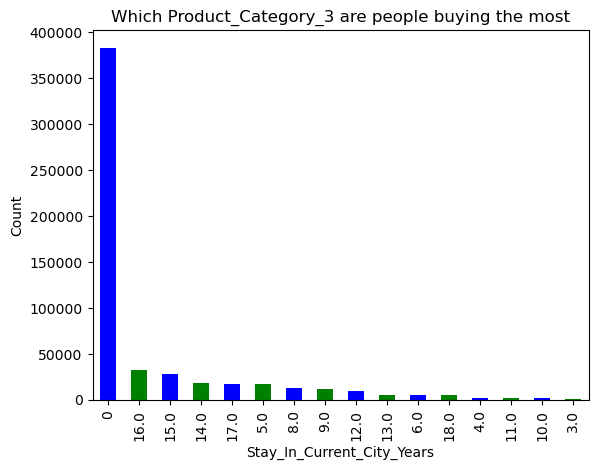

In [41]:
print(bftrain_df.Product_Category_3.value_counts())
bftrain_df.Product_Category_3.value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Count')
plt.title('Which Product_Category_3 are people buying the most')

<Axes: ylabel='Density'>

<Figure size 3000x1500 with 0 Axes>

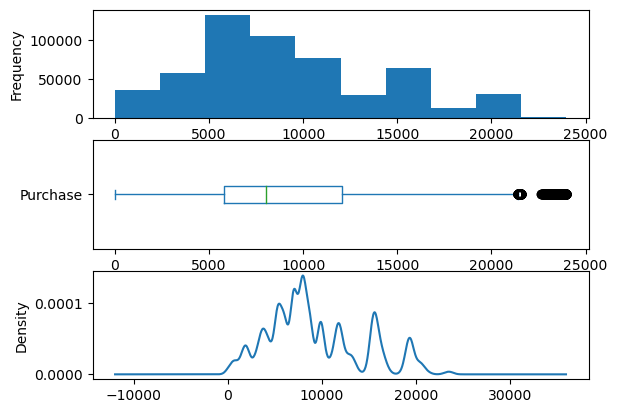

In [42]:
#hitogram,Boxplot,and density curve
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
bftrain_df.Purchase.plot(kind='hist',ax=ax[0])
bftrain_df.Purchase.plot(kind='box',vert=False,ax=ax[1])
bftrain_df.Purchase.plot(kind='kde',ax=ax[2])

In [43]:
pd.crosstab(bftrain_df.Age,bftrain_df.Gender)

Gender,F,M
Age,,
0-17,5083,10019
18-25,24628,75032
26-35,50752,168835
36-45,27170,82843
46-50,13199,32502
51-55,9894,28607
55+,5083,16421


In [44]:
bftrain_df.Purchase.groupby(bftrain_df.Gender).mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

In [45]:
bftrain_df.Purchase.groupby(bftrain_df.Gender).var()

Gender
F    2.272651e+07
M    2.593036e+07
Name: Purchase, dtype: float64

In [46]:
f=bftrain_df[bftrain_df.Gender=='F']
m=bftrain_df[bftrain_df.Gender=='M']

In [47]:
from scipy.stats import ttest_ind

In [48]:
ttest_ind(f.Purchase,m.Purchase,equal_var=False)
#since p-value=0.0 is less than .05 ,reject null hypothesis
# Alternative hypothesis is true, there is significance difference in average of purchase to Gender

Ttest_indResult(statistic=-46.358248669626064, pvalue=0.0)

In [49]:
bftrain_df.Purchase.groupby(bftrain_df.Marital_Status).mean()

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

In [50]:
bftrain_df.Purchase.groupby(bftrain_df.Marital_Status).var()

Marital_Status
0    2.527423e+07
1    2.516926e+07
Name: Purchase, dtype: float64

In [51]:
zero=bftrain_df[bftrain_df.Marital_Status==0]
one=bftrain_df[bftrain_df.Marital_Status==1]

In [52]:
ttest_ind(zero.Purchase,one.Purchase,equal_var=False)
#since p-value=0.7309975627344574 is more than .05 ,fail to reject null hypothesis
# Alternative hypothesis is false, there is no significance difference in average of purchase to Ma`rtial_status

Ttest_indResult(statistic=0.34379905124865934, pvalue=0.7309975627344574)

In [53]:
bftrain_df.Purchase.groupby(bftrain_df.Age).mean()

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64

In [54]:
bftrain_df.Purchase.groupby(bftrain_df.Age).var()

Age
0-17     2.612349e+07
18-25    2.534440e+07
26-35    2.510538e+07
36-45    2.522976e+07
46-50    2.467324e+07
51-55    2.588131e+07
55+      2.511507e+07
Name: Purchase, dtype: float64

In [55]:
a=bftrain_df[bftrain_df.Age=='0-17']
b=bftrain_df[bftrain_df.Age=='18-25']
c=bftrain_df[bftrain_df.Age=='26-35']
d=bftrain_df[bftrain_df.Age=='36-45']
e=bftrain_df[bftrain_df.Age=='46-50']
f=bftrain_df[bftrain_df.Age=='51-55']
g=bftrain_df[bftrain_df.Age=='55+']

In [56]:
from scipy.stats import f_oneway

In [57]:
f_oneway(a.Purchase,b.Purchase,c.Purchase,d.Purchase,e.Purchase,f.Purchase,g.Purchase)
#since p-value=1.053563939251671e-49 less than 0.05 ,reject null hypothesis
# alternative hypothesis is True, there is significance difference in average of purchase to Age

F_onewayResult(statistic=40.57579909450407, pvalue=1.053563939251671e-49)

In [58]:
bftrain_df.Purchase.groupby(bftrain_df.City_Category).mean()

City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64

In [59]:
A=bftrain_df[bftrain_df.City_Category=='A']
B=bftrain_df[bftrain_df.City_Category=='B']
C=bftrain_df[bftrain_df.City_Category=='C']

In [60]:
f_oneway(A.Purchase,B.Purchase,C.Purchase)
#since p-value=0.0 less than 0.05 ,reject null hypothesis
# alternative hypothesis is True, there is significance difference in average of purchase to Age

F_onewayResult(statistic=1130.7459610102974, pvalue=0.0)

In [61]:
bftrain_df.Purchase.groupby(bftrain_df.Stay_In_Current_City_Years).mean()

Stay_In_Current_City_Years
0     9180.075123
1     9250.145923
2     9320.429810
3     9286.904119
4+    9275.598872
Name: Purchase, dtype: float64

In [62]:
bftrain_df.Purchase.groupby(bftrain_df.Stay_In_Current_City_Years).var()

Stay_In_Current_City_Years
0     2.490489e+07
1     2.527552e+07
2     2.544787e+07
3     2.520385e+07
4+    2.517659e+07
Name: Purchase, dtype: float64

In [63]:
q=bftrain_df[bftrain_df.Stay_In_Current_City_Years=='0']
w=bftrain_df[bftrain_df.Stay_In_Current_City_Years=='1']
r=bftrain_df[bftrain_df.Stay_In_Current_City_Years=='2']
t=bftrain_df[bftrain_df.Stay_In_Current_City_Years=='3']
y=bftrain_df[bftrain_df.Stay_In_Current_City_Years=='4+']

In [64]:
f_oneway(q.Purchase,w.Purchase,e.Purchase,r.Purchase,t.Purchase,y.Purchase)
#since p-value=4.203053657961194e-08 less than 0.05 ,reject null hypothesis
# alternative hypothesis is True, there is significance difference in average of purchase to Stay_In_Current_City_years

F_onewayResult(statistic=8.545072191436018, pvalue=4.203053657961194e-08)

In [65]:
from scipy.stats import chi2_contingency

In [66]:
chi2_contingency(pd.crosstab(bftrain_df.Gender,bftrain_df.Age))

#Since the pvalue=4.2750569064909935e-302 is less than 0.05, reject null
# Alternative hyothesis ture, there is a relationship between Gender and Age

Chi2ContingencyResult(statistic=1412.7156576195039, pvalue=4.2750569064909935e-302, dof=6, expected_freq=array([[  3728.60722311,  24605.54865944,  54214.9168521 ,
         27161.65186304,  11283.34516642,   9505.70167507,
          5309.22856083],
       [ 11373.39277689,  75054.45134056, 165372.0831479 ,
         82851.34813696,  34417.65483358,  28995.29832493,
         16194.77143917]]))

In [67]:
bftrain_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Gender                      550068 non-null  object
 1   Age                         550068 non-null  object
 2   Occupation                  550068 non-null  int64 
 3   City_Category               550068 non-null  object
 4   Stay_In_Current_City_Years  550068 non-null  object
 5   Marital_Status              550068 non-null  int64 
 6   Product_Category_1          550068 non-null  int64 
 7   Product_Category_2          550068 non-null  object
 8   Product_Category_3          550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 46.2+ MB


In [68]:
chi2_contingency(pd.crosstab(bftrain_df.Gender,bftrain_df.Marital_Status))

#Since the pvalue=7.80091894540745e-18 is less than 0.05, reject null
# Alternative hyothesis ture, there is a relationship between Gender and Marital_Status

Chi2ContingencyResult(statistic=74.00272697523472, pvalue=7.80091894540745e-18, dof=1, expected_freq=array([[ 80174.43730412,  55634.56269588],
       [244556.56269588, 169702.43730412]]))

In [69]:
chi2_contingency(pd.crosstab(bftrain_df.Marital_Status,bftrain_df.Occupation))

#Since the pvalue=0.0 is less than 0.05, reject null
# Alternative hyothesis ture, there is a relationship between Occupation and Marital_Status

Chi2ContingencyResult(statistic=18710.023962434694, pvalue=0.0, dof=20, expected_freq=array([[41110.58519674, 27997.79737414, 15696.14634554, 10419.62475548,
        42686.81171782,  7188.65556077, 12016.51342198, 34908.98983944,
          912.67648   ,  3713.87305024,  7633.18686053,  6839.76047689,
        18406.42947599,  4562.20170597, 16121.78654094,  7181.57139663,
        14977.69403237, 23639.26538719,  3909.27791109,  4994.9260655 ,
        19813.22640474],
       [28527.41480326, 19428.20262586, 10891.85365446,  7230.37524452,
        29621.18828218,  4988.34443923,  8338.48657802, 24224.01016056,
          633.32352   ,  2577.12694976,  5296.81313947,  4746.23952311,
        12772.57052401,  3165.79829403, 11187.21345906,  4983.42860337,
        10393.30596763, 16403.73461281,  2712.72208891,  3466.0739345 ,
        13748.77359526]]))

### Spliting into X and y

In [70]:
y=bftrain_df.Purchase
X=bftrain_df.drop('Purchase',axis=1)

In [71]:
X

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,F,0-17,10,A,2,0,3,0,0
1,F,0-17,10,A,2,0,1,6.0,14.0
2,F,0-17,10,A,2,0,12,0,0
3,F,0-17,10,A,2,0,12,14.0,0
4,M,55+,16,C,4+,0,8,0,0
...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,0,0
550064,F,26-35,1,C,3,0,20,0,0
550065,F,26-35,15,B,4+,1,20,0,0
550066,F,55+,1,C,2,0,20,0,0


In [72]:
from sklearn.preprocessing import LabelEncoder

In [73]:
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = X[column].astype(str)
        label_encoder = LabelEncoder()
        X[column] = label_encoder.fit_transform(X[column])

In [74]:
X

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,10,0,2,0,3,0,0
1,0,0,10,0,2,0,1,14,5
2,0,0,10,0,2,0,12,0,0
3,0,0,10,0,2,0,12,5,0
4,1,6,16,2,4,0,8,0,0
...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,1,20,0,0
550064,0,2,1,2,3,0,20,0,0
550065,0,2,15,1,4,1,20,0,0
550066,0,6,1,2,2,0,20,0,0


In [75]:
for column in bftest_df.columns:
    if bftest_df[column].dtype == 'object':
        bftest_df[column] = X[column].astype(str)
        label_encoder = LabelEncoder()
        bftest_df[column] = label_encoder.fit_transform(bftest_df[column])

In [76]:
bftest_df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,7,0,2,1,1,0,0
1,0,0,17,0,2,0,3,6,11
2,0,0,1,0,2,1,5,0,0
3,0,0,1,0,2,1,4,13,0
4,1,6,1,2,4,0,4,0,0
...,...,...,...,...,...,...,...,...,...
233594,1,5,15,0,1,1,8,14,0
233595,1,2,15,1,2,1,5,2,0
233596,1,2,15,1,2,1,1,14,13
233597,1,2,1,1,2,0,10,8,0


# Linear Regression

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
reg=LinearRegression()

In [79]:
regmodel=reg.fit(X,y)

In [80]:
regmodel.score(X,y)

0.15114228563342946

In [81]:
regpredict=regmodel.predict(X)

In [82]:
rigresid=y-regpredict

In [83]:
np.sqrt(np.mean(rigresid**2))

4627.920472560829

In [84]:
regtestpredict=regmodel.predict(bftest_df)

In [85]:
pd.DataFrame(regtestpredict).to_csv('reg.csv')

# Ridge Regression

In [86]:
from sklearn.linear_model import Ridge

In [87]:
rid=Ridge()

In [88]:
ridmodel=rid.fit(X,y)

In [89]:
ridmodel.score(X,y)

0.15114228563322885

In [90]:
ridpredict=ridmodel.predict(X)

In [91]:
ridresid=y-ridpredict

In [92]:
np.sqrt(np.mean(ridresid**2))

4627.920472561375

In [93]:
ridtestpredict=ridmodel.predict(bftest_df)

In [94]:
pd.DataFrame(ridtestpredict).to_csv('ridge.csv')

# Lasso

In [95]:
from sklearn.linear_model import Lasso

In [96]:
la=Lasso()

In [97]:
lamodel=la.fit(X,y)

In [98]:
lamodel.score(X,y)

0.15114174576169326

In [99]:
lapredict=lamodel.predict(X)

In [100]:
laresid=y-lapredict

In [101]:
np.sqrt(np.mean(lapredict**2))

9467.394697853928

In [102]:
latestpredict=lamodel.predict(bftest_df)

In [103]:
pd.DataFrame(latestpredict).to_csv('Lasso.csv')

# Decession Tree

In [104]:
from sklearn.tree import DecisionTreeRegressor

In [105]:
tree=DecisionTreeRegressor()

In [106]:
treemodel=tree.fit(X,y)

In [107]:
treemodel.score(X,y)

0.792011247799655

In [108]:
treepredict=treemodel.predict(X)

In [109]:
treeresid=y-treepredict

In [110]:
np.sqrt(np.mean(treeresid**2))

2290.8062646412236

In [111]:
treetestpred=treemodel.predict(bftest_df)

In [112]:
pd.DataFrame(treetestpred).to_csv("tree.csv")

# Random Forest

In [113]:
from sklearn.ensemble import RandomForestRegressor

In [114]:
RF=RandomForestRegressor(n_estimators=1000)

In [ ]:
RFmodel=RF.fit(X,y)

In [ ]:
RFmodel.score(X,y)

In [ ]:
rfpredict=RFmodel.predict(X)

In [ ]:
rfresid=y-rfpredict

In [ ]:
np.sqrt(np.mean(rfresid**2))

In [ ]:
RFtestpredict=RFmodel.predict(bftest_df)

In [ ]:
pd.DataFrame(RFtestpredict).to_csv('RF.csv')

# GBM

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbm=GradientBoostingRegressor(n_estimators=100,learning_rate=1)

In [ ]:
gbmmodel=gbm.fit(X,y)

In [ ]:
gbmmodel.score(X,y)

In [ ]:
gbmpredict=gbmmodel.predict(X)

In [ ]:
gbmresid=y-gbmpredict

In [ ]:
np.sqrt(np.mean(gbmresid**2))

In [ ]:
GBMtestpredict=gbmmodel.predict(bftest_df)

In [ ]:
pd.DataFrame(GBMtestpredict).to_csv('GBM.csv')

# KNN regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn=KNeighborsRegressor(n_neighbors=5)

In [ ]:
knnmodel=knn.fit(X,y)

In [ ]:
knnmodel.score(X,y)

In [ ]:
knnpredict=knnmodel.predict(X)

In [ ]:
knnresid=y-knnpredict

In [ ]:
np.sqrt(np.mean(knnresid**2))

In [ ]:
knntestpredict=knnmodel.predict(bftest_df)

In [ ]:
pd.DataFrame(knntestpredict).to_csv('knn.csv')

# xgboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
#!pip install xgboost

In [ ]:
xbg=XGBRegressor(learning_rate=1,max_depth=6,min_child_weight=40,seed=0)

In [ ]:
xbgmodel=xbg.fit(X,y)

In [ ]:
xbgmodel.score(X,y)

In [ ]:
xbgpredict=xbgmodel.predict(X)

In [ ]:
xbgresid=y-xbgpredict

In [ ]:
np.sqrt(np.mean(xbgresid**2))

In [ ]:
xbgtestpredict=xbgmodel.predict(bftest_df)

In [ ]:
pd.DataFrame(xbgtestpredict).to_csv('xbg.csv')

# lightgbm

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
#!pip install lightgbm

In [ ]:
lgbm=LGBMRegressor()

In [ ]:
lgbmmodel=lgbm.fit(X,y)

In [ ]:
lgbmmodel.score(X,y)

In [ ]:
lgbmpredict=lgbmmodel.predict(X)

In [ ]:
lgbmresid=y-lgbmpredict

In [ ]:
np.sqrt(np.mean(lgbmresid**2))

In [ ]:
lgbmtestpredict=lgbmmodel.predict(bftest_df)

In [ ]:
pd.DataFrame(lgbmtestpredict).to_csv('lgbm.csv')

# Summary

Here is the summary of all the models built on the black friday dataset. The following table shows the metrics used to compare and select the best fit model.

| Model | R_square Score | Accuracy Score|RMSE|
|:------:|:--------------:|:-------------:|:------|
|Linear Regression|0.15114228563342946|4867.12559083909|4627.920472560829|
|Ridge Regression|0.15114228563322885|4867.12544729857|4627.920472561375|
|Lasso Regression|0.15114174576169326|4866.85103082047|9467.394697853928|
|Decision tree|0.792011247799655|4139.40539092241|2290.8062646412236|
|**Random Forest**|**0.7831283066611664**|**3513.61247029982**|**2339.213558938**|
|Gradient boosting machines|0.6636417806549322|3647.56411854937|2913.194354968578|
|KNN regression|0.6933047390919168|4566.68773657365|2781.7748094101566|
|XGBRegressor|0.6872586168564615|3491.49370422484|2809.060634329716|
|LGBMRegressor|0.6653946377234622|3207.16454494605|2905.5937031150897|

According to the performance metrics, the Random Forest model has the highest R-square score and accuracy among the models you've tested. Here's a summary of the models:

Random Forest:
R-square Score: 0.783
Accuracy Score: 3513.61
RMSE: 2339.21
The Random Forest model shows a good balance between capturing the variance in the data and making accurate predictions. It often performs well in diverse scenarios and is less prone to overfitting compared to a single decision tree.